<a href="https://colab.research.google.com/github/sanvasu/Delhivery---Feature-Engineering/blob/main/Delhivery_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("delhivery_data.csv")

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.shape

(8194, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            8194 non-null   object 
 1   trip_creation_time              8194 non-null   object 
 2   route_schedule_uuid             8194 non-null   object 
 3   route_type                      8194 non-null   object 
 4   trip_uuid                       8194 non-null   object 
 5   source_center                   8194 non-null   object 
 6   source_name                     8169 non-null   object 
 7   destination_center              8194 non-null   object 
 8   destination_name                8184 non-null   object 
 9   od_start_time                   8194 non-null   object 
 10  od_end_time                     8194 non-null   object 
 11  start_scan_to_end_scan          8194 non-null   float64
 12  is_cutoff                       81

In [ ]:
df.isna().sum()

data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
trip_uuid                          0
source_center                      0
source_name                       25
destination_center                 0
destination_name                  10
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
is_cutoff                          0
cutoff_factor                      0
cutoff_timestamp                   0
actual_distance_to_destination     1
actual_time                        1
osrm_time                          1
osrm_distance                      1
factor                             1
segment_actual_time                1
segment_osrm_time                  1
segment_osrm_distance              1
segment_factor                     1
dtype: int64

In [ ]:
df['source_name'] = df['source_name'].replace(np.nan, 'NA')
df['destination_name'] = df['destination_name'].replace(np.nan, 'NA')


In [ ]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    1
actual_time                       1
osrm_time                         1
osrm_distance                     1
factor                            1
segment_actual_time               1
segment_osrm_time                 1
segment_osrm_distance             1
segment_factor                    1
dtype: int64

In [ ]:
df.drop(columns=['is_cutoff', 'cutoff_factor','cutoff_timestamp','factor','segment_factor'], inplace=True)

#Finding unique entries in each column

In [ ]:
for col in df.columns:
  print(f"Unique entries for column {col} : {df[col].nunique()}")

Unique entries for column data : 2
Unique entries for column trip_creation_time : 918
Unique entries for column route_schedule_uuid : 625
Unique entries for column route_type : 2
Unique entries for column trip_uuid : 918
Unique entries for column source_center : 729
Unique entries for column source_name : 726
Unique entries for column destination_center : 730
Unique entries for column destination_name : 727
Unique entries for column od_start_time : 1650
Unique entries for column od_end_time : 1650
Unique entries for column start_scan_to_end_scan : 560
Unique entries for column actual_distance_to_destination : 8174
Unique entries for column actual_time : 1579
Unique entries for column osrm_time : 1032
Unique entries for column osrm_distance : 8086
Unique entries for column segment_actual_time : 231
Unique entries for column segment_osrm_time : 99
Unique entries for column segment_osrm_distance : 7979


In [ ]:
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

#Converting datetime columns into pandas datatime format

In [ ]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [ ]:
df.dtypes

data                                    category
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                              category
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
dtype: object

#Grouping by Segment

In [ ]:
df['Segment_Key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Segment_Key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB


In [ ]:
seg_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in seg_cols:
    df[col + '_sum'] = df.groupby('Segment_Key')[col].cumsum()

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Segment_Key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0


#Aggregating at Segment Level

In [ ]:
create_segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last'
}

In [ ]:
segment_values = df.groupby('Segment_Key').agg(create_segment_dict).reset_index()
sorted_value = segment_values.sort_values(by=['Segment_Key','od_end_time'],ascending=True)
sorted_value

,Segment_Key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671191949943656_IND487001AAB_IND487551AAA,trip-153671191949943656,training,FTL,2018-09-12 00:25:19.499696,Narsinghpur_KndliDPP_D (Madhya Pradesh),Gadarwara_MPward_D (Madhya Pradesh),2018-09-12 04:33:09.726898,2018-09-12 05:59:13.062416,86.0,42.630333,78.0,42.0,48.4129,78.0,41.0,48.4129,78.0,41.0,48.4129
1,trip-153671191949943656_IND487551AAA_IND464668AAA,trip-153671191949943656,training,FTL,2018-09-12 00:25:19.499696,Gadarwara_MPward_D (Madhya Pradesh),Bareli_SourvDPP_D (Madhya Pradesh),2018-09-12 05:59:13.062416,2018-09-12 09:23:49.463096,204.0,57.345262,175.0,63.0,76.0934,174.0,91.0,92.1494,174.0,91.0,92.1494
2,trip-153671237597058150_IND785690AAB_IND785682AAA,trip-153671237597058150,training,Carting,2018-09-12 00:32:55.970840,Sonari_Central_DPP_1 (Assam),Sivasagar_Babupaty_D (Assam),2018-09-12 03:48:42.530167,2018-09-12 08:00:47.150111,252.0,39.495954,241.0,33.0,46.9087,240.0,49.0,56.7577,240.0,49.0,56.7577
3,trip-153671262893947351_IND500055AAC_IND501401AAC,trip-153671262893947351,training,Carting,2018-09-12 00:37:08.939733,Hyderabad_North_D_2 (Telangana),Medchal_MROoffce_D (Telangana),2018-09-12 01:05:52.573005,2018-09-12 02:05:34.840021,59.0,14.859201,30.0,12.0,16.0049,30.0,12.0,16.0049,30.0,12.0,16.0049
4,trip-153671262893947351_IND501401AAC_IND500010AAA,trip-153671262893947351,training,Carting,2018-09-12 00:37:08.939733,Medchal_MROoffce_D (Telangana),Hyderabad_Alwal_I (Telangana),2018-09-12 02:05:34.840021,2018-09-12 05:35:54.020732,210.0,9.499885,165.0,14.0,14.4597,165.0,14.0,14.4597,165.0,14.0,14.4597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,trip-153860909786408355_IND385320AAA_IND385340AAB,trip-153860909786408355,test,FTL,2018-10-03 23:24:57.864330,Bhabhar_TirupDPP_D (Gujarat),Radhanpur_Santalpr_D (Gujarat),2018-10-04 02:53:43.565042,2018-10-04 03:30:21.541336,36.0,27.199984,36.0,37.0,29.7998,36.0,36.0,29.7998,36.0,36.0,29.7998
1646,trip-153860960901509071_IND424006AAA_IND424101AAA,trip-153860960901509071,test,Carting,2018-10-03 23:33:29.015349,Dhule_MIDCAvdn_I (Maharashtra),Chalisgaon_BhadgDPP_D (Maharashtra),2018-10-03 23:33:29.015349,2018-10-04 02:01:39.366874,148.0,49.732416,128.0,41.0,57.1276,127.0,47.0,67.7456,127.0,47.0,67.7456
1647,trip-153861034802474617_IND245101AAA_IND201007AAA,trip-153861034802474617,test,Carting,2018-10-03 23:45:48.025062,Hapur_Swargash_D (Uttar Pradesh),GZB_Mohan_Nagar_DPC (Uttar Pradesh),2018-10-04 02:54:40.713577,2018-10-04 05:23:28.396643,148.0,44.106290,123.0,50.0,46.5093,121.0,50.0,48.5795,121.0,50.0,48.5795
1648,trip-153861089872028474_IND600116AAB_IND602024AAA,trip-153861089872028474,test,Carting,2018-10-03 23:54:58.720536,Chennai_Porur_DPC (Tamil Nadu),Chennai_Vepmpttu_DC (Tamil Nadu),2018-10-03 23:54:58.720536,2018-10-04 02:03:42.668131,128.0,12.205818,32.0,18.0,22.7501,32.0,23.0,18.1033,32.0,23.0,18.1033


#Feature Engineering

In [ ]:
segment_values['time_diff'] = (segment_values['od_end_time'] - segment_values['od_start_time'])
segment_values['od_time_diff_hour'] = segment_values['time_diff'].dt.total_seconds()/3600
segment_values.head(10)

,Segment_Key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,time_diff,od_time_diff_hour
0,trip-153671191949943656_IND487001AAB_IND487551AAA,trip-153671191949943656,training,FTL,2018-09-12 00:25:19.499696,Narsinghpur_KndliDPP_D (Madhya Pradesh),Gadarwara_MPward_D (Madhya Pradesh),2018-09-12 04:33:09.726898,2018-09-12 05:59:13.062416,86.0,...,42.0,48.4129,78.0,41.0,48.4129,78.0,41.0,48.4129,0 days 01:26:03.335518,1.434260
1,trip-153671191949943656_IND487551AAA_IND464668AAA,trip-153671191949943656,training,FTL,2018-09-12 00:25:19.499696,Gadarwara_MPward_D (Madhya Pradesh),Bareli_SourvDPP_D (Madhya Pradesh),2018-09-12 05:59:13.062416,2018-09-12 09:23:49.463096,204.0,...,63.0,76.0934,174.0,91.0,92.1494,174.0,91.0,92.1494,0 days 03:24:36.400680,3.410111
2,trip-153671237597058150_IND785690AAB_IND785682AAA,trip-153671237597058150,training,Carting,2018-09-12 00:32:55.970840,Sonari_Central_DPP_1 (Assam),Sivasagar_Babupaty_D (Assam),2018-09-12 03:48:42.530167,2018-09-12 08:00:47.150111,252.0,...,33.0,46.9087,240.0,49.0,56.7577,240.0,49.0,56.7577,0 days 04:12:04.619944,4.201283
3,trip-153671262893947351_IND500055AAC_IND501401AAC,trip-153671262893947351,training,Carting,2018-09-12 00:37:08.939733,Hyderabad_North_D_2 (Telangana),Medchal_MROoffce_D (Telangana),2018-09-12 01:05:52.573005,2018-09-12 02:05:34.840021,59.0,...,12.0,16.0049,30.0,12.0,16.0049,30.0,12.0,16.0049,0 days 00:59:42.267016,0.995074
4,trip-153671262893947351_IND501401AAC_IND500010AAA,trip-153671262893947351,training,Carting,2018-09-12 00:37:08.939733,Medchal_MROoffce_D (Telangana),Hyderabad_Alwal_I (Telangana),2018-09-12 02:05:34.840021,2018-09-12 05:35:54.020732,210.0,...,14.0,14.4597,165.0,14.0,14.4597,165.0,14.0,14.4597,0 days 03:30:19.180711,3.505328
5,trip-153671320807895983_IND121004AAB_IND121102AAA,trip-153671320807895983,training,Carting,2018-09-12 00:46:48.079257,FBD_Balabhgarh_DPC (Haryana),Palwal (Haryana),2018-09-12 00:46:48.079257,2018-09-12 01:53:32.471405,66.0,...,28.0,39.7245,44.0,27.0,39.7244,44.0,27.0,39.7244,0 days 01:06:44.392148,1.112331
6,trip-153671320807895983_IND121102AAA_IND121004AAB,trip-153671320807895983,training,Carting,2018-09-12 00:46:48.079257,Palwal (Haryana),FBD_Balabhgarh_DPC (Haryana),2018-09-12 01:53:32.471405,2018-09-12 05:07:14.232558,193.0,...,29.0,40.2548,98.0,28.0,40.4251,98.0,28.0,40.4251,0 days 03:13:41.761153,3.228267
7,trip-153671549993828365_IND384205AAA_IND384355AAB,trip-153671549993828365,training,FTL,2018-09-12 01:24:59.938573,Mehsana_Panchot_IP (Gujarat),Vadnagar_BsstdDPP_D (Gujarat),2018-09-12 01:24:59.938573,2018-09-12 02:49:41.237888,84.0,...,34.0,37.0025,57.0,34.0,37.0025,57.0,34.0,37.0025,0 days 01:24:41.299315,1.411472
8,trip-153671549993828365_IND384355AAB_IND385001AAA,trip-153671549993828365,training,FTL,2018-09-12 01:24:59.938573,Vadnagar_BsstdDPP_D (Gujarat),Palanpur_DC (Gujarat),2018-09-12 02:49:41.237888,2018-09-12 04:41:54.672799,112.0,...,65.0,70.5626,108.0,67.0,62.4468,108.0,67.0,62.4468,0 days 01:52:13.434911,1.870399
9,trip-153671549993828365_IND385001AAA_IND385535AAA,trip-153671549993828365,training,FTL,2018-09-12 01:24:59.938573,Palanpur_DC (Gujarat),Deesa_HawaiPlr_DC (Gujarat),2018-09-12 04:41:54.672799,2018-09-12 05:36:37.434672,54.0,...,16.0,23.2930,30.0,16.0,23.2930,30.0,16.0,23.2930,0 days 00:54:42.761873,0.911878


In [ ]:
segment_values[['destination_city', 'destination_place']] = segment_values['destination_name'].str.split('_', n=1, expand=True)


In [ ]:
segment_values[['destintion_place_code','destination_state']] = segment_values['destination_place'].str.extract(r'(.+) \((.+)\)')
segment_values.drop(columns='destination_place',inplace=True)
segment_values.sample()

,Segment_Key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,time_diff,od_time_diff_hour,destination_city,destintion_place_code,destination_state
22,trip-153673012557297456_IND637301AAA_IND638001AAA,trip-153673012557297456,training,FTL,2018-09-12 05:28:45.573225,Sankari_Trchngrd_D (Tamil Nadu),Erode (Tamil Nadu),2018-09-12 11:41:25.585152,2018-09-12 12:17:36.627801,36.0,...,17.0,21.0327,36.0,17.0,21.0327,0 days 00:36:11.042649,0.603067,Erode (Tamil Nadu),NaN,NaN


In [ ]:
segment_values[['source_city', 'source_place']] = segment_values['source_name'].str.split('_', n=1, expand=True)
segment_values[['source_place_code','source_state']] = segment_values['source_place'].str.extract(r'(.+) \((.+)\)')
segment_values.drop(columns='source_place',inplace=True)


In [ ]:
segment_values['trip_day'] = segment_values['trip_creation_time'].dt.day_name()
segment_values['trip_month'] = segment_values['trip_creation_time'].dt.month_name()
segment_values['trip_year'] = segment_values['trip_creation_time'].dt.year
segment_values['trip_hour'] = segment_values['trip_creation_time'].dt.hour
segment_values.sample()

,Segment_Key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_city,destintion_place_code,destination_state,source_city,source_place_code,source_state,trip_day,trip_month,trip_year,trip_hour
567,trip-153734243713535747_IND122503AAA_IND122001AAA,trip-153734243713535747,training,Carting,2018-09-19 07:33:57.135589,Pataudi_DC (Haryana),GGN_DPC (Haryana),2018-09-19 09:45:58.494339,2018-09-19 13:10:02.480576,204.0,...,GGN,DPC,Haryana,Pataudi,DC,Haryana,Wednesday,September,2018,7


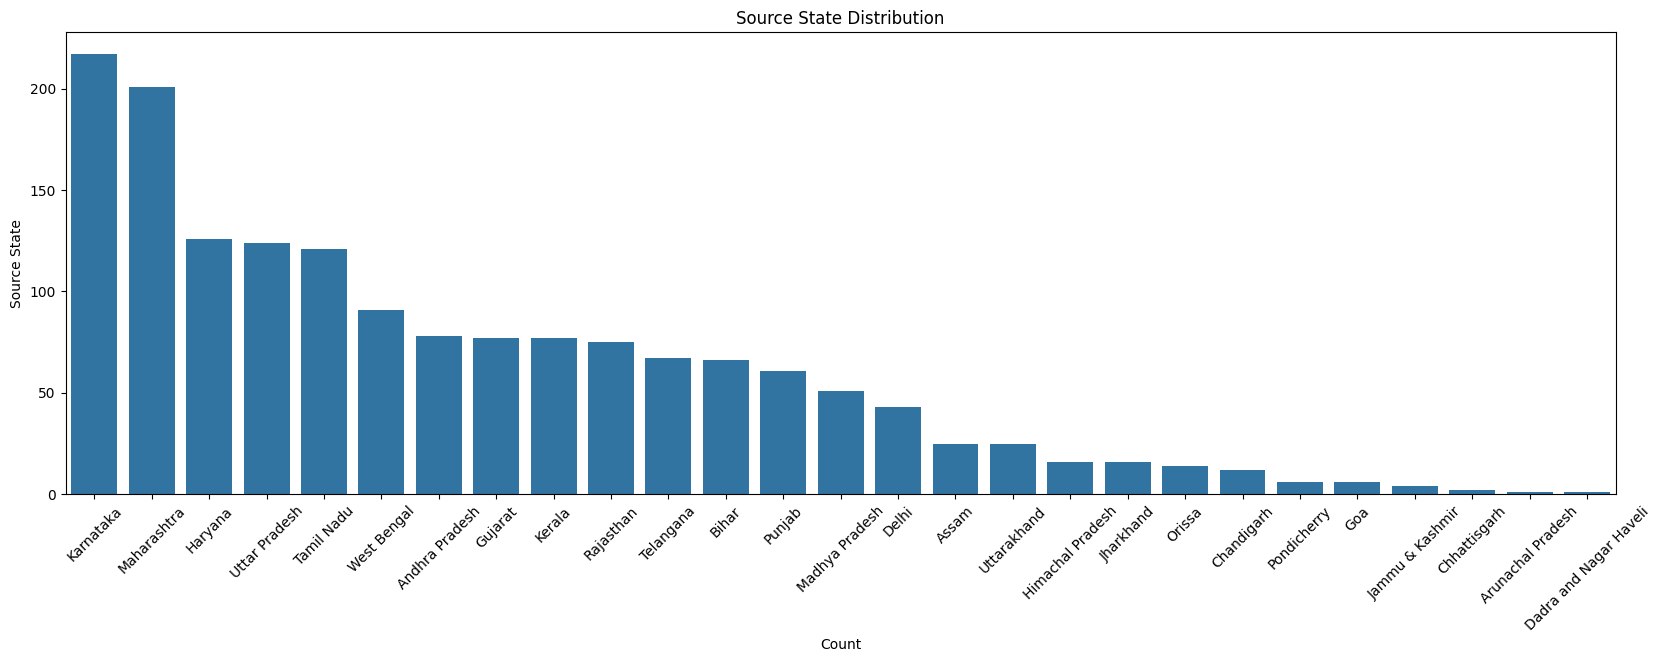

In [ ]:
source_state_counts = segment_values['source_state'].value_counts()
plt.figure(figsize=(20,6))
sns.barplot(x=source_state_counts.index, y = source_state_counts.values)

plt.xlabel('Count')
plt.ylabel('Source State')
plt.title('Source State Distribution')
plt.xticks(rotation=45)
plt.show()

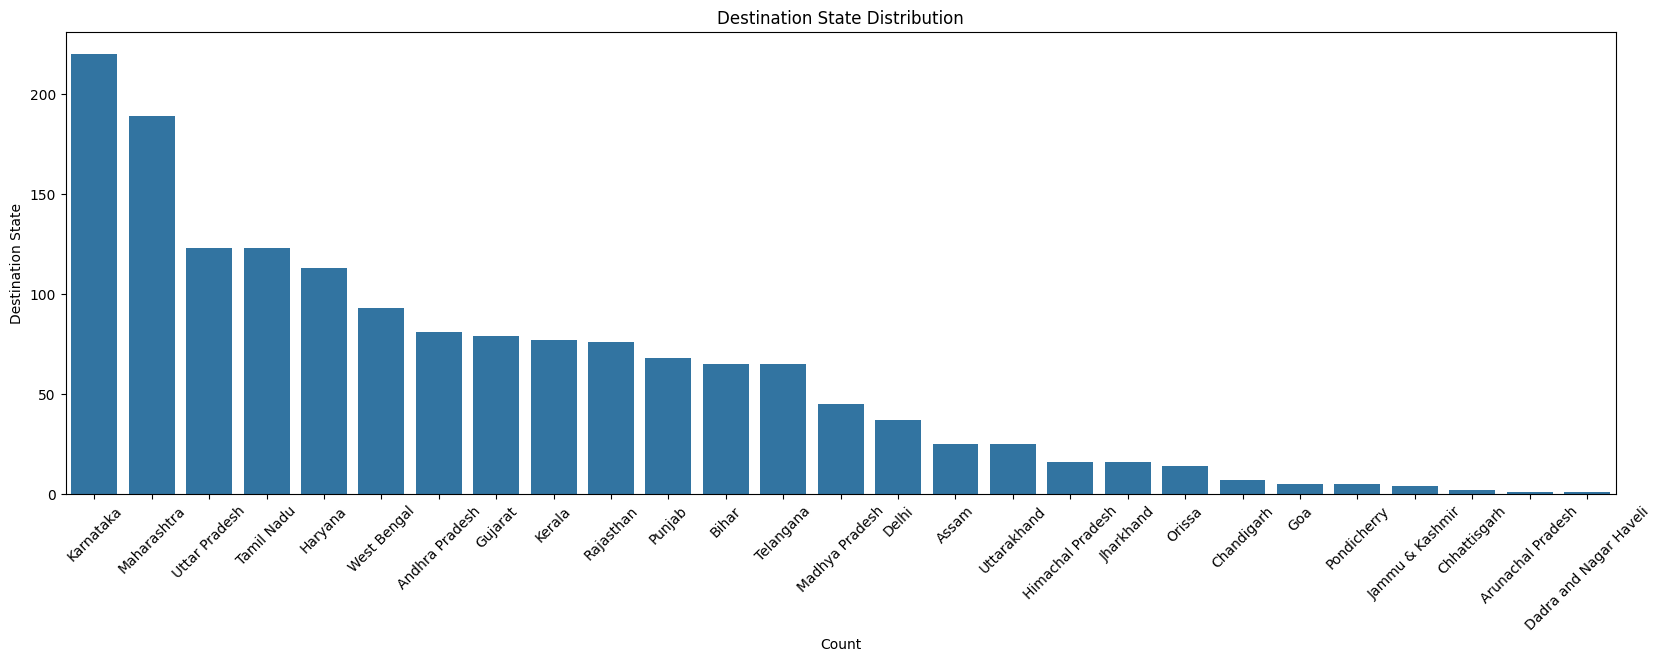

In [ ]:
destination_state_counts = segment_values['destination_state'].value_counts()
plt.figure(figsize=(20,6))
sns.barplot(x=destination_state_counts.index, y = destination_state_counts.values)
plt.xlabel('Count')
plt.ylabel('Destination State')
plt.title('Destination State Distribution')
plt.xticks(rotation=45)
plt.show()

#In-depth analysis:

In [ ]:
group_trip_uuid = segment_values.groupby('trip_uuid').agg(create_segment_dict).reset_index(drop = True)
group_trip_uuid.head()


,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671191949943656,training,FTL,2018-09-12 00:25:19.499696,Narsinghpur_KndliDPP_D (Madhya Pradesh),Bareli_SourvDPP_D (Madhya Pradesh),2018-09-12 04:33:09.726898,2018-09-12 09:23:49.463096,86.0,57.345262,175.0,63.0,76.0934,252.0,132.0,140.5623,174.0,91.0,92.1494
1,trip-153671237597058150,training,Carting,2018-09-12 00:32:55.970840,Sonari_Central_DPP_1 (Assam),Sivasagar_Babupaty_D (Assam),2018-09-12 03:48:42.530167,2018-09-12 08:00:47.150111,252.0,39.495954,241.0,33.0,46.9087,240.0,49.0,56.7577,240.0,49.0,56.7577
2,trip-153671262893947351,training,Carting,2018-09-12 00:37:08.939733,Hyderabad_North_D_2 (Telangana),Hyderabad_Alwal_I (Telangana),2018-09-12 01:05:52.573005,2018-09-12 05:35:54.020732,59.0,9.499885,165.0,14.0,14.4597,195.0,26.0,30.4646,165.0,14.0,14.4597
3,trip-153671320807895983,training,Carting,2018-09-12 00:46:48.079257,FBD_Balabhgarh_DPC (Haryana),FBD_Balabhgarh_DPC (Haryana),2018-09-12 00:46:48.079257,2018-09-12 05:07:14.232558,66.0,38.372339,100.0,29.0,40.2548,142.0,55.0,80.1495,98.0,28.0,40.4251
4,trip-153671549993828365,training,FTL,2018-09-12 01:24:59.938573,Mehsana_Panchot_IP (Gujarat),Mehsana_Panchot_IP (Gujarat),2018-09-12 01:24:59.938573,2018-09-12 10:48:48.948386,84.0,73.480804,149.0,77.0,89.3603,344.0,194.0,212.1026,149.0,77.0,89.3603


In [ ]:
numerical_columns = group_trip_uuid.select_dtypes(include=[np.float32, np.float64])
numerical_columns

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,86.0,57.345262,175.0,63.0,76.0934,252.0,132.0,140.5623,174.0,91.0,92.1494
1,252.0,39.495954,241.0,33.0,46.9087,240.0,49.0,56.7577,240.0,49.0,56.7577
2,59.0,9.499885,165.0,14.0,14.4597,195.0,26.0,30.4646,165.0,14.0,14.4597
3,66.0,38.372339,100.0,29.0,40.2548,142.0,55.0,80.1495,98.0,28.0,40.4251
4,84.0,73.480804,149.0,77.0,89.3603,344.0,194.0,212.1026,149.0,77.0,89.3603
...,...,...,...,...,...,...,...,...,...,...,...
913,100.0,49.694455,71.0,40.0,54.5780,70.0,38.0,54.5780,70.0,38.0,54.5780
914,31.0,27.199984,36.0,37.0,29.7998,202.0,170.0,163.4647,36.0,36.0,29.7998
915,148.0,49.732416,128.0,41.0,57.1276,127.0,47.0,67.7456,127.0,47.0,67.7456
916,148.0,44.106290,123.0,50.0,46.5093,121.0,50.0,48.5795,121.0,50.0,48.5795


## Function to detect outliers using IQR


In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers



In [ ]:
outliers_iqr = {col: detect_outliers_iqr(segment_values, col) for col in numerical_columns}
outliers_iqr

{'start_scan_to_end_scan':                                             Segment_Key  \
 19    trip-153672049730580194_IND175015AAA_IND174001AAA   
 26    trip-153673586858116198_IND000000ACB_IND421302AAG   
 27    trip-153673586858116198_IND160002AAC_IND000000ACB   
 33    trip-153674451943468946_IND712311AAA_IND700088AAA   
 35    trip-153675277150289730_IND821115AAB_IND000000ACB   
 ...                                                 ...   
 1596  trip-153854357553580056_IND462022AAA_IND842003AAB   
 1597  trip-153854454228187770_IND421302AAG_IND834002AAB   
 1600  trip-153855540908113479_IND000000ACB_IND421302AAG   
 1601  trip-153855540908113479_IND160002AAC_IND000000ACB   
 1628  trip-153859749808005250_IND000000ACB_IND382430AAB   
 
                     trip_uuid      data route_type         trip_creation_time  \
 19    trip-153672049730580194  training        FTL 2018-09-12 02:48:17.306055   
 26    trip-153673586858116198  training        FTL 2018-09-12 07:04:28.581420   
 27   

# Create boxplots for each numerical column


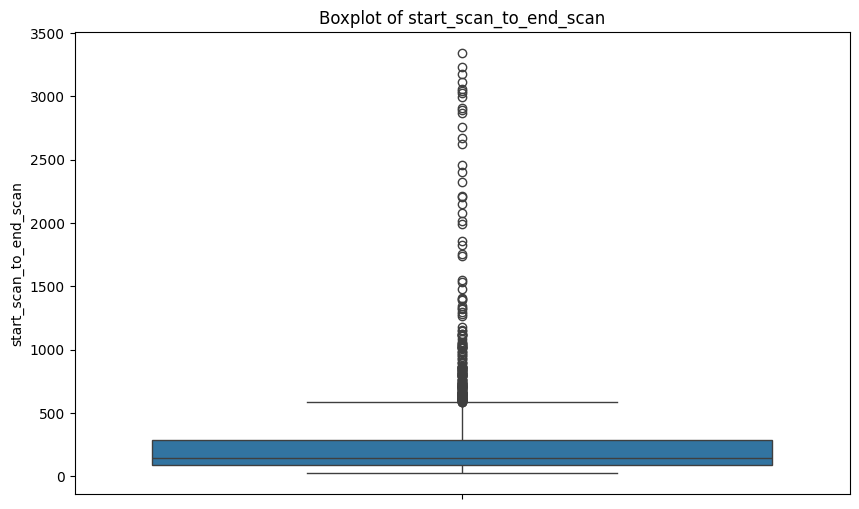

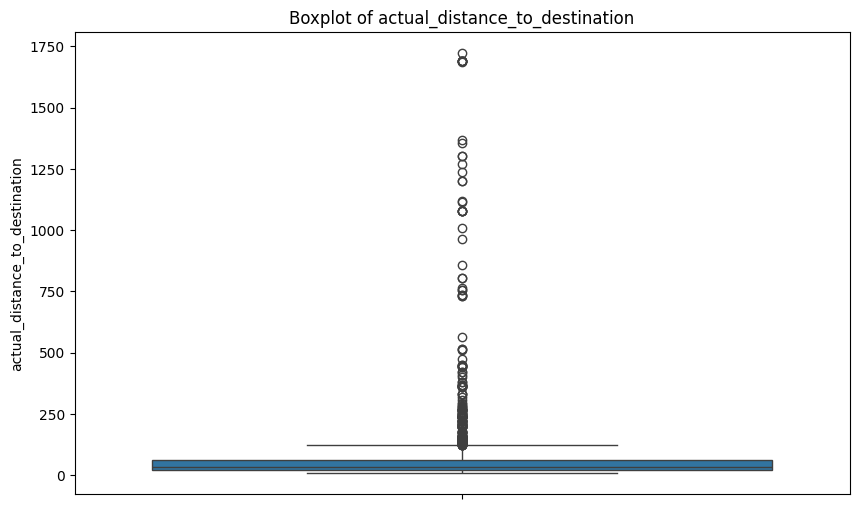

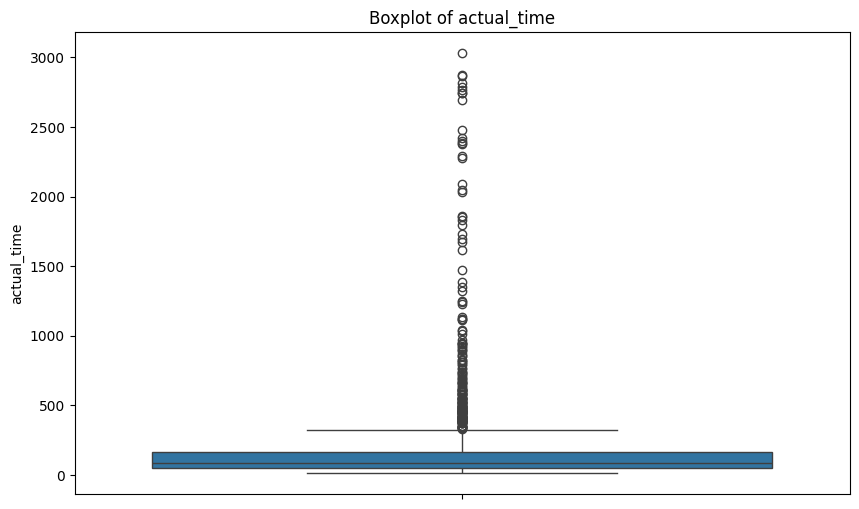

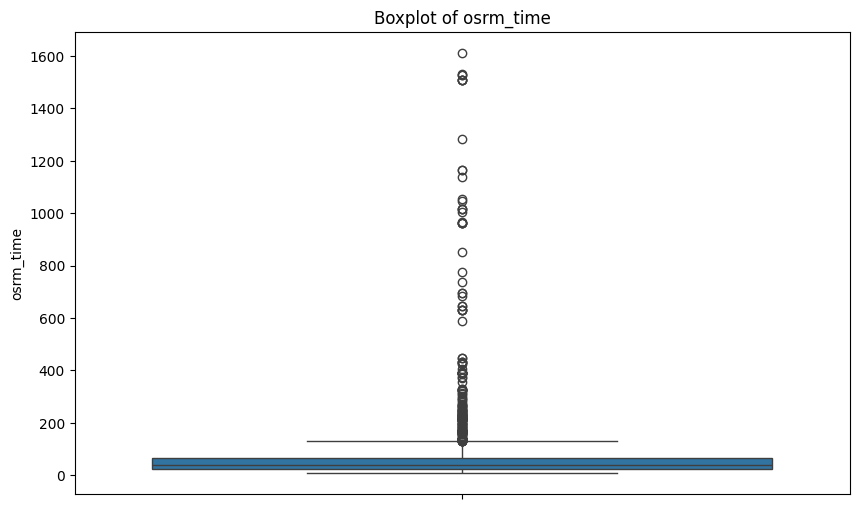

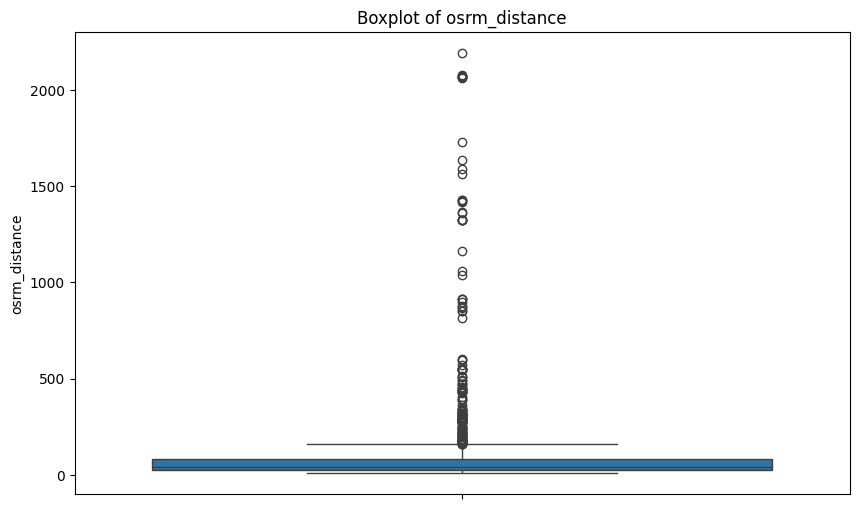

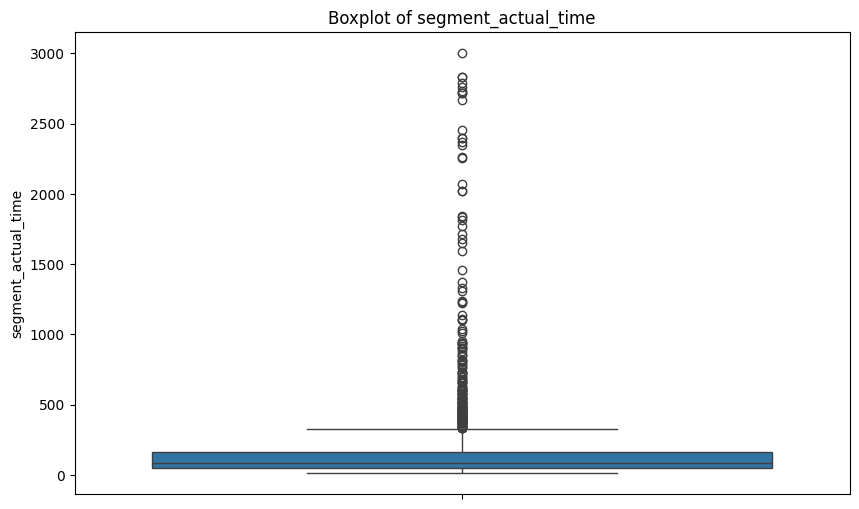

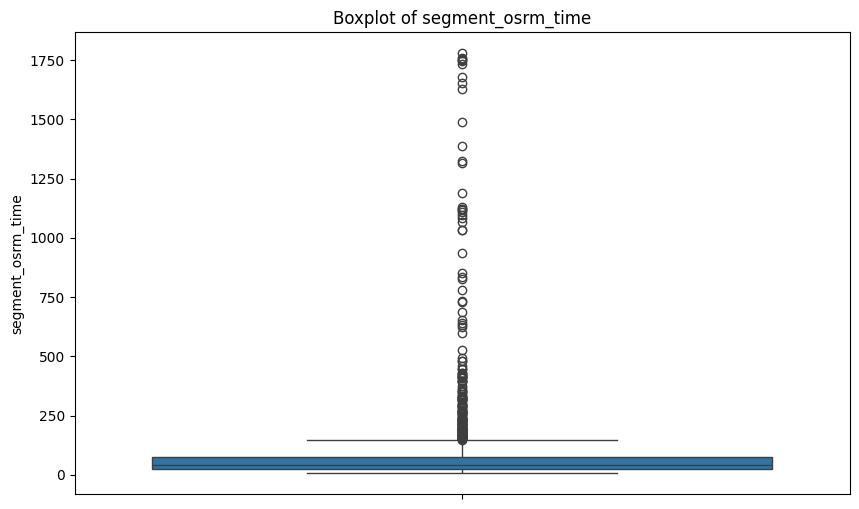

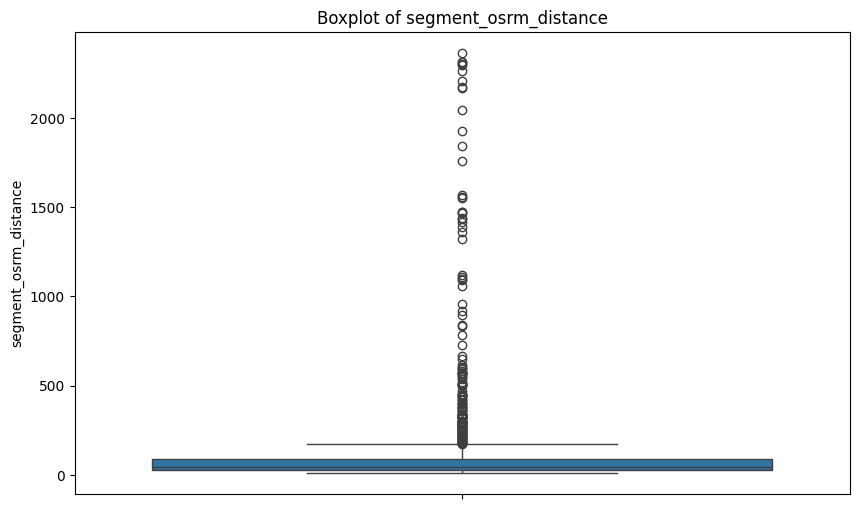

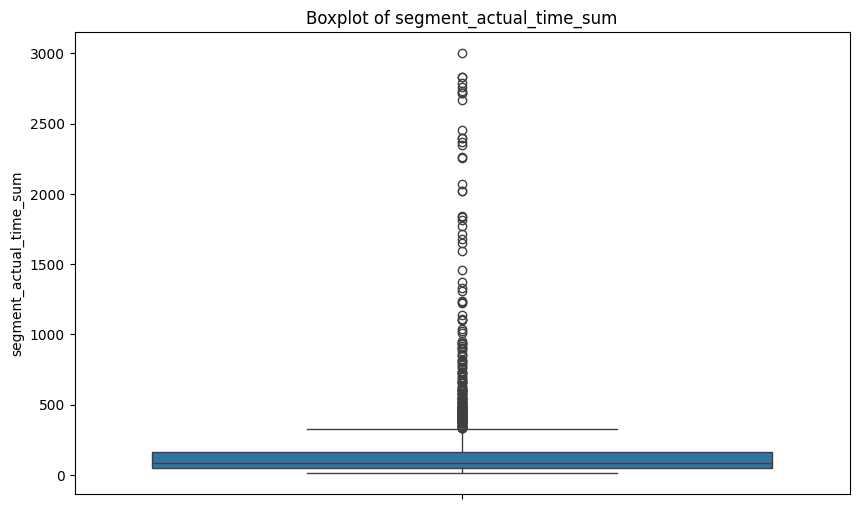

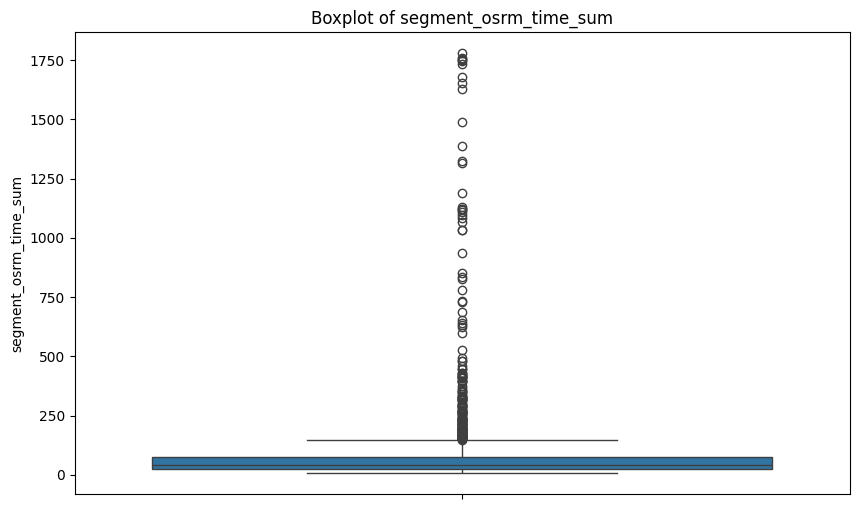

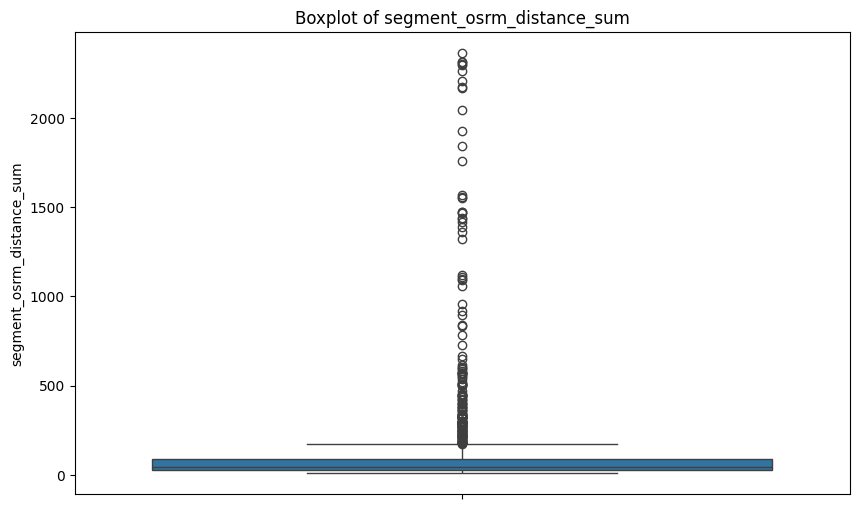

In [ ]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=segment_values[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

#Handle the outliers using the IQR method.

In [ ]:
def handle_outliers_iqr(df, column, lower_bound, upper_bound):
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
for column in numerical_columns:
  handle_outliers_iqr(segment_values, column, segment_values[column].quantile(0.25), segment_values[column].quantile(0.75))

In [ ]:
segment_values.head()

,Segment_Key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_city,destintion_place_code,destination_state,source_city,source_place_code,source_state,trip_day,trip_month,trip_year,trip_hour
0,trip-153671191949943656_IND487001AAB_IND487551AAA,trip-153671191949943656,training,FTL,2018-09-12 00:25:19.499696,Narsinghpur_KndliDPP_D (Madhya Pradesh),Gadarwara_MPward_D (Madhya Pradesh),2018-09-12 04:33:09.726898,2018-09-12 05:59:13.062416,90.0,...,Gadarwara,MPward_D,Madhya Pradesh,Narsinghpur,KndliDPP_D,Madhya Pradesh,Wednesday,September,2018,0
1,trip-153671191949943656_IND487551AAA_IND464668AAA,trip-153671191949943656,training,FTL,2018-09-12 00:25:19.499696,Gadarwara_MPward_D (Madhya Pradesh),Bareli_SourvDPP_D (Madhya Pradesh),2018-09-12 05:59:13.062416,2018-09-12 09:23:49.463096,204.0,...,Bareli,SourvDPP_D,Madhya Pradesh,Gadarwara,MPward_D,Madhya Pradesh,Wednesday,September,2018,0
2,trip-153671237597058150_IND785690AAB_IND785682AAA,trip-153671237597058150,training,Carting,2018-09-12 00:32:55.970840,Sonari_Central_DPP_1 (Assam),Sivasagar_Babupaty_D (Assam),2018-09-12 03:48:42.530167,2018-09-12 08:00:47.150111,252.0,...,Sivasagar,Babupaty_D,Assam,Sonari,Central_DPP_1,Assam,Wednesday,September,2018,0
3,trip-153671262893947351_IND500055AAC_IND501401AAC,trip-153671262893947351,training,Carting,2018-09-12 00:37:08.939733,Hyderabad_North_D_2 (Telangana),Medchal_MROoffce_D (Telangana),2018-09-12 01:05:52.573005,2018-09-12 02:05:34.840021,90.0,...,Medchal,MROoffce_D,Telangana,Hyderabad,North_D_2,Telangana,Wednesday,September,2018,0
4,trip-153671262893947351_IND501401AAC_IND500010AAA,trip-153671262893947351,training,Carting,2018-09-12 00:37:08.939733,Medchal_MROoffce_D (Telangana),Hyderabad_Alwal_I (Telangana),2018-09-12 02:05:34.840021,2018-09-12 05:35:54.020732,210.0,...,Hyderabad,Alwal_I,Telangana,Medchal,MROoffce_D,Telangana,Wednesday,September,2018,0


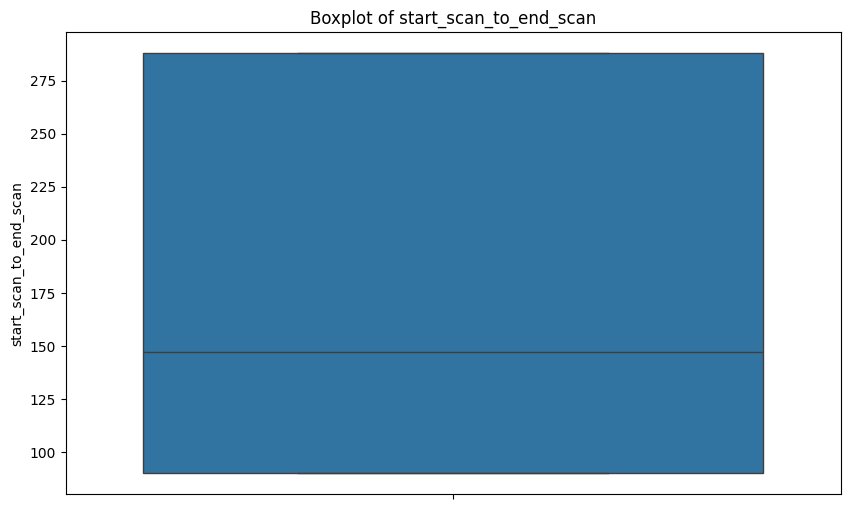

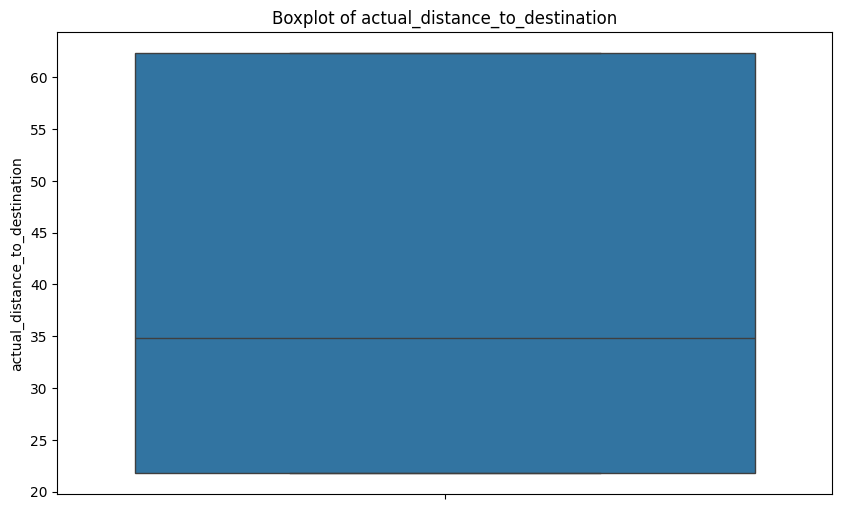

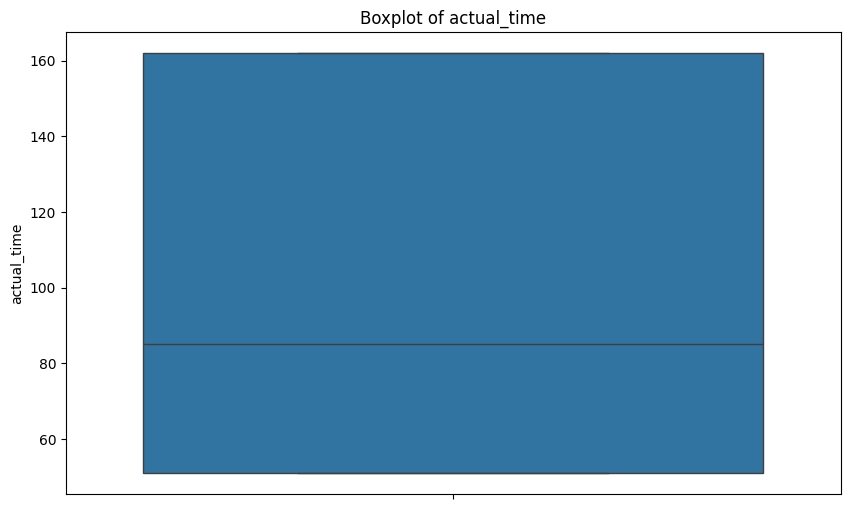

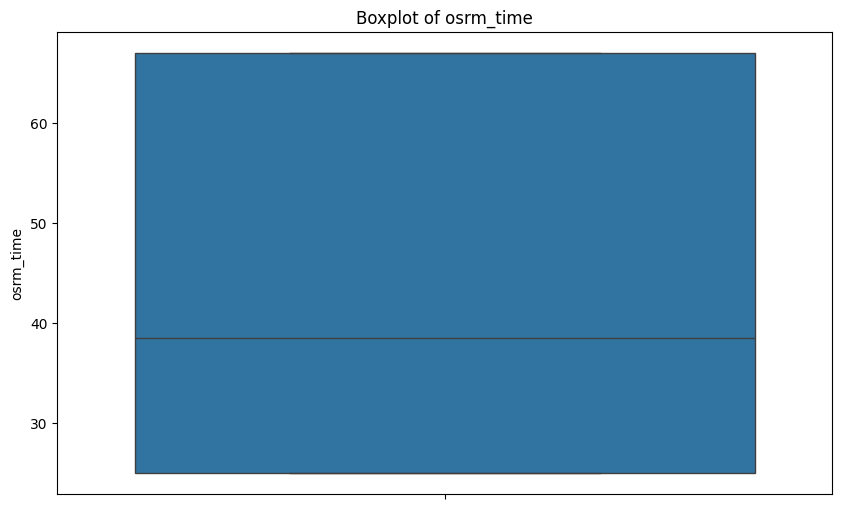

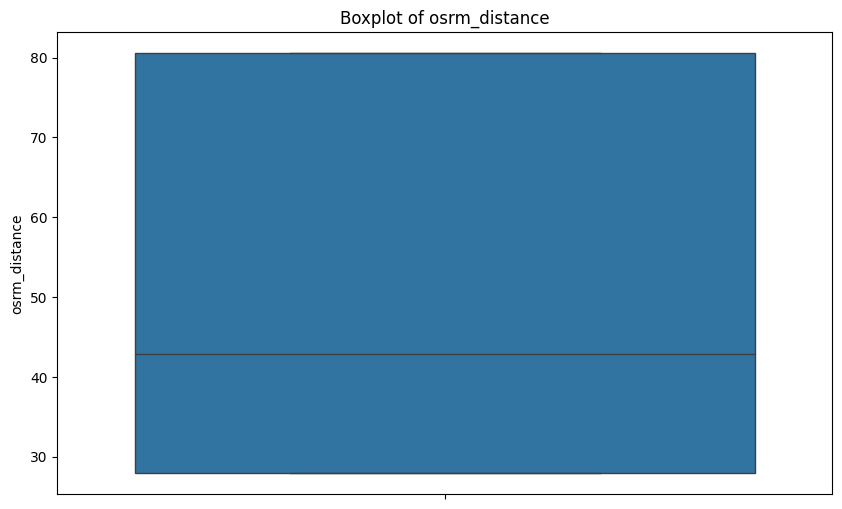

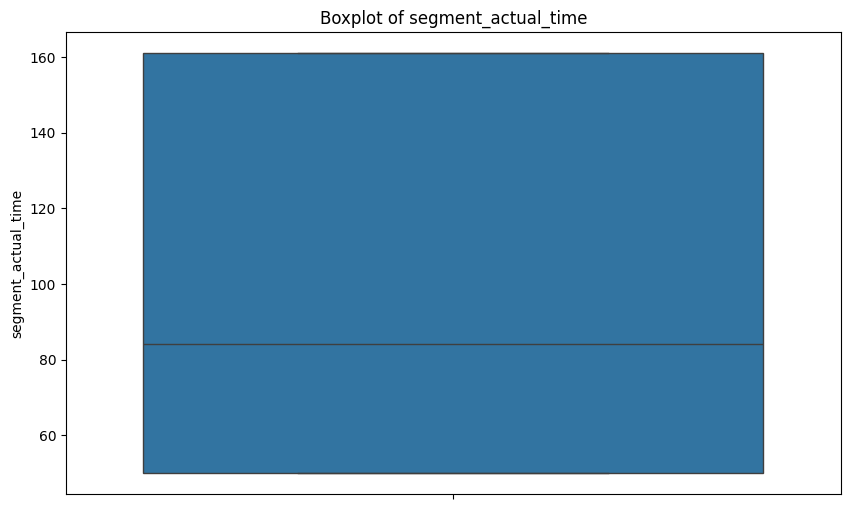

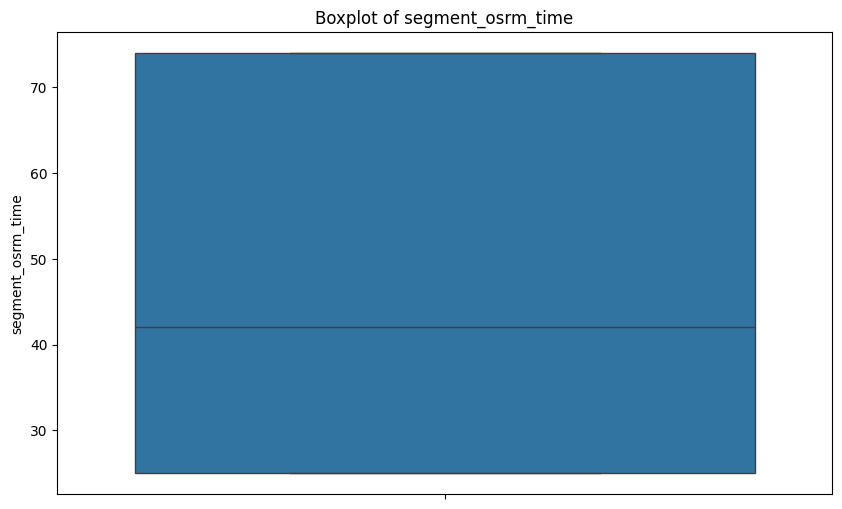

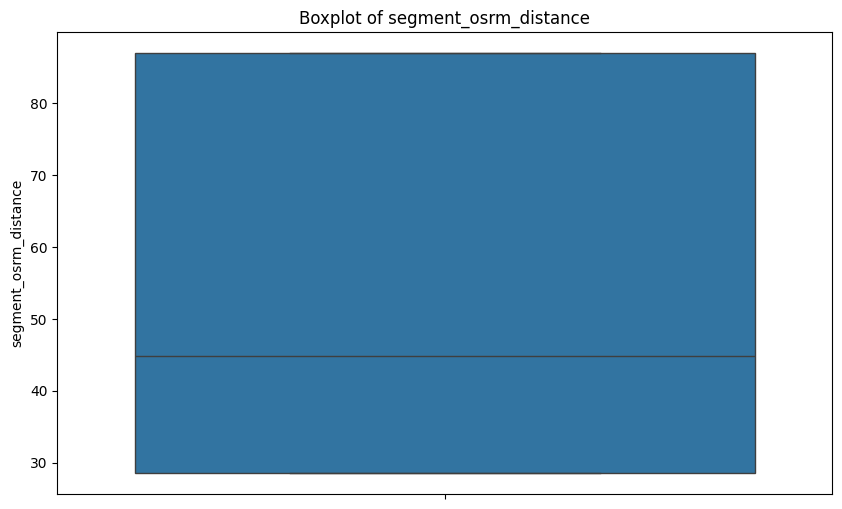

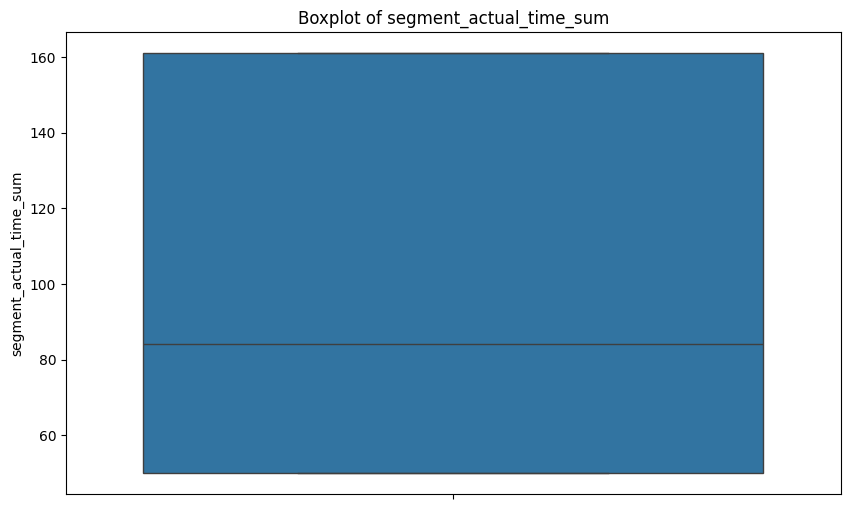

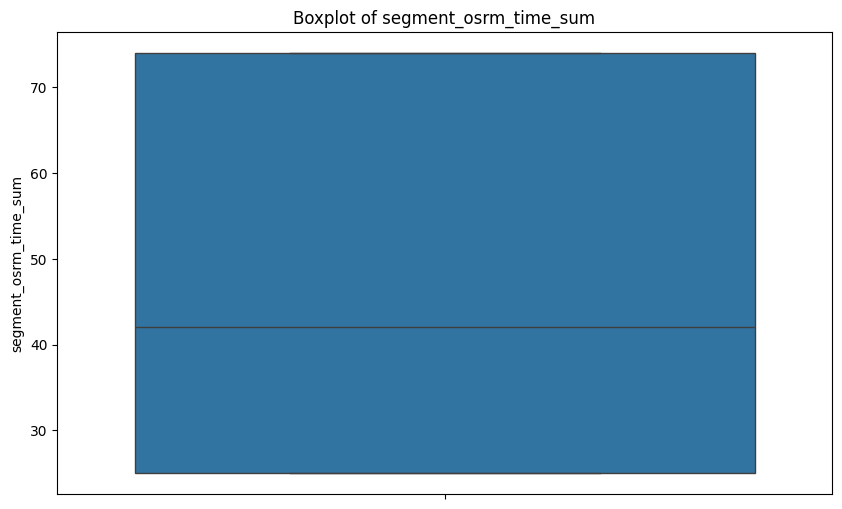

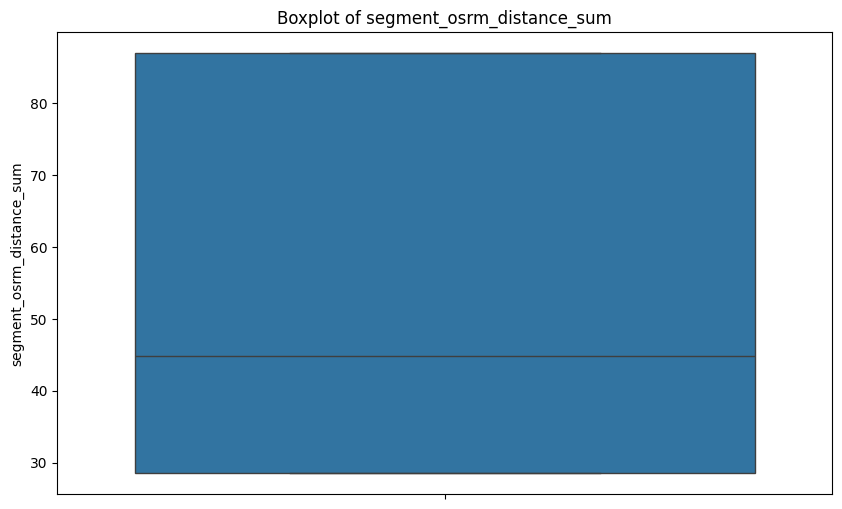

In [ ]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=segment_values[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

#one-hot encoding on categorical features.

In [ ]:
group_trip_uuid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       918 non-null    object        
 1   data                            918 non-null    category      
 2   route_type                      918 non-null    category      
 3   trip_creation_time              918 non-null    datetime64[ns]
 4   source_name                     918 non-null    object        
 5   destination_name                918 non-null    object        
 6   od_start_time                   918 non-null    datetime64[ns]
 7   od_end_time                     918 non-null    datetime64[ns]
 8   start_scan_to_end_scan          918 non-null    float64       
 9   actual_distance_to_destination  918 non-null    float64       
 10  actual_time                     918 non-null    float64       
 11  osrm_t

In [ ]:
categorical_columns = ['data','route_type']
categorical_columns

['data', 'route_type']

In [ ]:
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   start_scan_to_end_scan          918 non-null    float64
 1   actual_distance_to_destination  918 non-null    float64
 2   actual_time                     918 non-null    float64
 3   osrm_time                       918 non-null    float64
 4   osrm_distance                   918 non-null    float64
 5   segment_actual_time             918 non-null    float64
 6   segment_osrm_time               918 non-null    float64
 7   segment_osrm_distance           918 non-null    float64
 8   segment_actual_time_sum         918 non-null    float64
 9   segment_osrm_time_sum           918 non-null    float64
 10  segment_osrm_distance_sum       918 non-null    float64
dtypes: float64(11)
memory usage: 79.0 KB


In [ ]:
one_hot_encoded_df = pd.get_dummies(group_trip_uuid, columns=categorical_columns)
one_hot_encoded_df

,trip_uuid,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671191949943656,2018-09-12 00:25:19.499696,Narsinghpur_KndliDPP_D (Madhya Pradesh),Bareli_SourvDPP_D (Madhya Pradesh),2018-09-12 04:33:09.726898,2018-09-12 09:23:49.463096,86.0,57.345262,175.0,63.0,...,252.0,132.0,140.5623,174.0,91.0,92.1494,False,True,False,True
1,trip-153671237597058150,2018-09-12 00:32:55.970840,Sonari_Central_DPP_1 (Assam),Sivasagar_Babupaty_D (Assam),2018-09-12 03:48:42.530167,2018-09-12 08:00:47.150111,252.0,39.495954,241.0,33.0,...,240.0,49.0,56.7577,240.0,49.0,56.7577,False,True,True,False
2,trip-153671262893947351,2018-09-12 00:37:08.939733,Hyderabad_North_D_2 (Telangana),Hyderabad_Alwal_I (Telangana),2018-09-12 01:05:52.573005,2018-09-12 05:35:54.020732,59.0,9.499885,165.0,14.0,...,195.0,26.0,30.4646,165.0,14.0,14.4597,False,True,True,False
3,trip-153671320807895983,2018-09-12 00:46:48.079257,FBD_Balabhgarh_DPC (Haryana),FBD_Balabhgarh_DPC (Haryana),2018-09-12 00:46:48.079257,2018-09-12 05:07:14.232558,66.0,38.372339,100.0,29.0,...,142.0,55.0,80.1495,98.0,28.0,40.4251,False,True,True,False
4,trip-153671549993828365,2018-09-12 01:24:59.938573,Mehsana_Panchot_IP (Gujarat),Mehsana_Panchot_IP (Gujarat),2018-09-12 01:24:59.938573,2018-09-12 10:48:48.948386,84.0,73.480804,149.0,77.0,...,344.0,194.0,212.1026,149.0,77.0,89.3603,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,trip-153860611759727126,2018-10-03 22:35:17.597524,Jamnagar_Dc (Gujarat),Khambhalia_JdswarRD_D (Gujarat),2018-10-04 01:15:37.459297,2018-10-04 02:55:55.680715,100.0,49.694455,71.0,40.0,...,70.0,38.0,54.5780,70.0,38.0,54.5780,True,False,False,True
914,trip-153860909786408355,2018-10-03 23:24:57.864330,Unjha_DC (Gujarat),Radhanpur_Santalpr_D (Gujarat),2018-10-04 00:21:58.203266,2018-10-04 03:30:21.541336,31.0,27.199984,36.0,37.0,...,202.0,170.0,163.4647,36.0,36.0,29.7998,True,False,False,True
915,trip-153860960901509071,2018-10-03 23:33:29.015349,Dhule_MIDCAvdn_I (Maharashtra),Chalisgaon_BhadgDPP_D (Maharashtra),2018-10-03 23:33:29.015349,2018-10-04 02:01:39.366874,148.0,49.732416,128.0,41.0,...,127.0,47.0,67.7456,127.0,47.0,67.7456,True,False,True,False
916,trip-153861034802474617,2018-10-03 23:45:48.025062,Hapur_Swargash_D (Uttar Pradesh),GZB_Mohan_Nagar_DPC (Uttar Pradesh),2018-10-04 02:54:40.713577,2018-10-04 05:23:28.396643,148.0,44.106290,123.0,50.0,...,121.0,50.0,48.5795,121.0,50.0,48.5795,True,False,True,False


#Normalize/ Standardize the numerical features using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
group_trip_uuid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       918 non-null    object        
 1   data                            918 non-null    category      
 2   route_type                      918 non-null    category      
 3   trip_creation_time              918 non-null    datetime64[ns]
 4   source_name                     918 non-null    object        
 5   destination_name                918 non-null    object        
 6   od_start_time                   918 non-null    datetime64[ns]
 7   od_end_time                     918 non-null    datetime64[ns]
 8   start_scan_to_end_scan          918 non-null    float64       
 9   actual_distance_to_destination  918 non-null    float64       
 10  actual_time                     918 non-null    float64       
 11  osrm_t

In [ ]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time','segment_osrm_time',
           'segment_osrm_distance', 'segment_actual_time_sum','segment_osrm_time_sum','segment_osrm_distance_sum']
one_hot_encoded_df[num_cols] = scaler.fit_transform(one_hot_encoded_df[num_cols])
one_hot_encoded_df

,trip_uuid,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671191949943656,2018-09-12 00:25:19.499696,Narsinghpur_KndliDPP_D (Madhya Pradesh),Bareli_SourvDPP_D (Madhya Pradesh),2018-09-12 04:33:09.726898,2018-09-12 09:23:49.463096,0.016616,0.028142,0.053678,0.034311,...,0.074875,0.065229,0.052557,0.053864,0.046866,0.034959,False,True,False,True
1,trip-153671237597058150,2018-09-12 00:32:55.970840,Sonari_Central_DPP_1 (Assam),Sivasagar_Babupaty_D (Assam),2018-09-12 03:48:42.530167,2018-09-12 08:00:47.150111,0.066767,0.017722,0.075547,0.015596,...,0.071115,0.021568,0.018854,0.075945,0.023151,0.019921,False,True,True,False
2,trip-153671262893947351,2018-09-12 00:37:08.939733,Hyderabad_North_D_2 (Telangana),Hyderabad_Alwal_I (Telangana),2018-09-12 01:05:52.573005,2018-09-12 05:35:54.020732,0.008459,0.000209,0.050364,0.003743,...,0.057018,0.009469,0.008280,0.050853,0.003388,0.001948,False,True,True,False
3,trip-153671320807895983,2018-09-12 00:46:48.079257,FBD_Balabhgarh_DPC (Haryana),FBD_Balabhgarh_DPC (Haryana),2018-09-12 00:46:48.079257,2018-09-12 05:07:14.232558,0.010574,0.017066,0.028827,0.013100,...,0.040414,0.024724,0.028262,0.028438,0.011293,0.012981,False,True,True,False
4,trip-153671549993828365,2018-09-12 01:24:59.938573,Mehsana_Panchot_IP (Gujarat),Mehsana_Panchot_IP (Gujarat),2018-09-12 01:24:59.938573,2018-09-12 10:48:48.948386,0.016012,0.037562,0.045063,0.043044,...,0.103697,0.097843,0.081328,0.045500,0.038961,0.033774,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,trip-153860611759727126,2018-10-03 22:35:17.597524,Jamnagar_Dc (Gujarat),Khambhalia_JdswarRD_D (Gujarat),2018-10-04 01:15:37.459297,2018-10-04 02:55:55.680715,0.020846,0.023676,0.019218,0.019963,...,0.017857,0.015781,0.017978,0.019070,0.016940,0.018994,True,False,False,True
914,trip-153860909786408355,2018-10-03 23:24:57.864330,Unjha_DC (Gujarat),Radhanpur_Santalpr_D (Gujarat),2018-10-04 00:21:58.203266,2018-10-04 03:30:21.541336,0.000000,0.010543,0.007621,0.018091,...,0.059211,0.085218,0.061768,0.007695,0.015810,0.008466,True,False,False,True
915,trip-153860960901509071,2018-10-03 23:33:29.015349,Dhule_MIDCAvdn_I (Maharashtra),Chalisgaon_BhadgDPP_D (Maharashtra),2018-10-03 23:33:29.015349,2018-10-04 02:01:39.366874,0.035347,0.023698,0.038105,0.020586,...,0.035714,0.020516,0.023273,0.038140,0.022021,0.024589,True,False,True,False
916,trip-153861034802474617,2018-10-03 23:45:48.025062,Hapur_Swargash_D (Uttar Pradesh),GZB_Mohan_Nagar_DPC (Uttar Pradesh),2018-10-04 02:54:40.713577,2018-10-04 05:23:28.396643,0.035347,0.020413,0.036448,0.026201,...,0.033835,0.022094,0.015565,0.036132,0.023715,0.016446,True,False,True,False


#Hypothesis Testing

In [ ]:
from scipy.stats import ttest_rel
agg_df = df.groupby('trip_uuid').agg({
    'actual_time': 'mean',
    'osrm_time': 'mean'
}).reset_index()
agg_df

,trip_uuid,actual_time,osrm_time
0,trip-153671191949943656,98.200000,46.600000
1,trip-153671237597058150,198.000000,24.200000
2,trip-153671262893947351,69.666667,11.333333
3,trip-153671320807895983,54.300000,19.500000
4,trip-153671549993828365,82.000000,44.666667
...,...,...,...
913,trip-153860611759727126,53.333333,31.333333
914,trip-153860909786408355,43.444444,37.222222
915,trip-153860960901509071,54.142857,26.714286
916,trip-153861034802474617,78.400000,32.000000


In [ ]:
t_test,p_value = ttest_rel(agg_df['actual_time'], agg_df['osrm_time'])
print(f"t-test statistic: {t_test}")
print(f"p-value: {p_value}")

t-test statistic: 19.37219474849616
p-value: 2.3824351766866627e-70


Text(0.5, 1.0, 'Boxplot of Actual Time and OSRM Time')

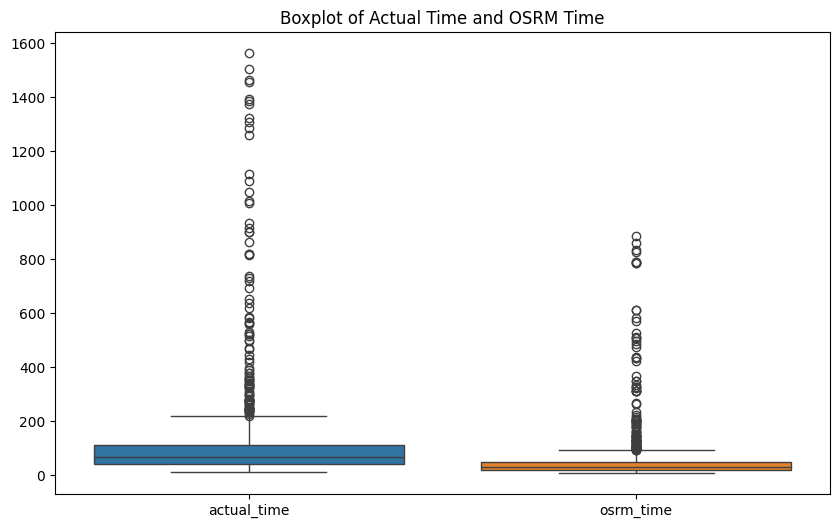

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=agg_df[['actual_time', 'osrm_time']])
plt.title('Boxplot of Actual Time and OSRM Time')

In [ ]:
agg_df_time = df.groupby('trip_uuid').agg({
    'actual_time': 'mean',
    'segment_actual_time': 'mean'
}).reset_index()

t_stat, p_value = ttest_rel(agg_df_time['actual_time'], agg_df_time['segment_actual_time'])
print(f"t-test statistic: {t_stat}")
print(f"p-value: {p_value}")

t-test statistic: 14.14568133470998
p-value: 3.076103438948574e-41


Text(0.5, 1.0, 'Boxplot of Actual Time and Segment Actual Time')

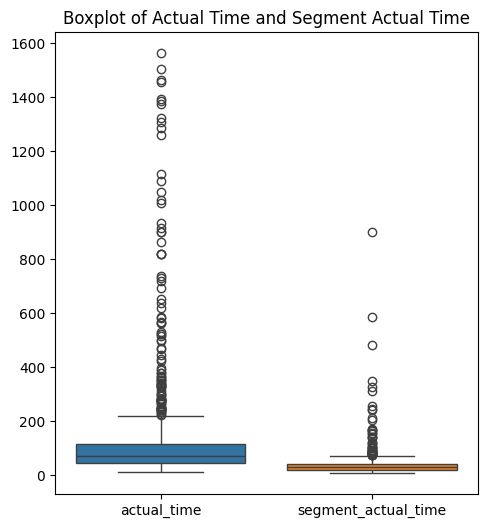

In [ ]:
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=agg_df_time[['actual_time', 'segment_actual_time']])
plt.title('Boxplot of Actual Time and Segment Actual Time')


In [ ]:
agg_df_osrm = df.groupby('trip_uuid').agg({
    'osrm_distance': 'mean',
    'segment_osrm_distance': 'mean'
}).reset_index()

t_test,p_value = ttest_rel(agg_df_osrm['osrm_distance'], agg_df_osrm['segment_osrm_distance'])
print(f"t-test statistic: {t_test}")
print(f"p-value: {p_value}")

t-test statistic: 12.403467430819179
p-value: 9.029969503543548e-33


Text(0.5, 1.0, 'Boxplot of OSRM Distance and Segment OSRM Distance')

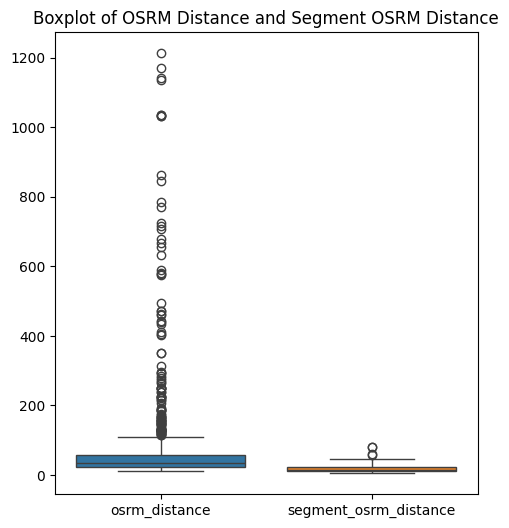

In [ ]:
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=agg_df_osrm[['osrm_distance', 'segment_osrm_distance']])
plt.title('Boxplot of OSRM Distance and Segment OSRM Distance')

In [ ]:
agg_df_osrm_agg = df.groupby('trip_uuid').agg({
    'osrm_time': 'mean',
    'segment_osrm_time': 'mean'
}).reset_index()

t_test,p_value = ttest_rel(agg_df_osrm_agg['osrm_time'], agg_df_osrm_agg['segment_osrm_time'])
print(f"t-test statistic: {t_test}")
print(f"p-value: {p_value}")

t-test statistic: 13.255806107098834
p-value: 8.048642233776421e-37


Text(0.5, 1.0, 'Boxplot of OSRM Time and Segment OSRM Time')

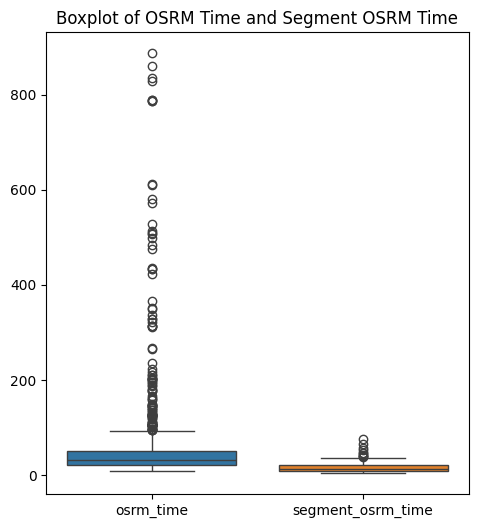

In [ ]:
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=agg_df_osrm_agg[['osrm_time', 'segment_osrm_time']])
plt.title('Boxplot of OSRM Time and Segment OSRM Time')

#Business Insights & Recommendations

* Karnataka and Maharastra having more number of orders.

* Trip between Angamaly to Chalakudy saw the least avg time for completion.

* FTL transportation is more than carting transportation.


#Recommendations:
* Since most orders are coming and going to Karnataka andMaharashtra , company have to expand the strategy used in Karnataka and Maharashtra to other states.

* Company have to analyse Hyderabad to Shamshabad route and make necessary changes to make the route fast.

* Proper route type for each route should be implemented.
